# OSCILLAZIONI FORZATE

In [1]:
import numpy as np
import pandas as pd

from matplotlib import pyplot as plt

import os

dir_path = os.path.abspath('')
FILE = dir_path + '/../CSV/' + 'osci_forz.csv'
fr = pd.read_csv(FILE)

omega = np.array(fr['omega']) # rad/s
A = np.array(fr['A']) * 0.01 # m

# plot $\omega$ - Ampiezza

0.12881003724525417 2.58887356390202 0.19422178121027237
incertezze su M w0 g [0.00417946 0.006225   0.0093507 ]


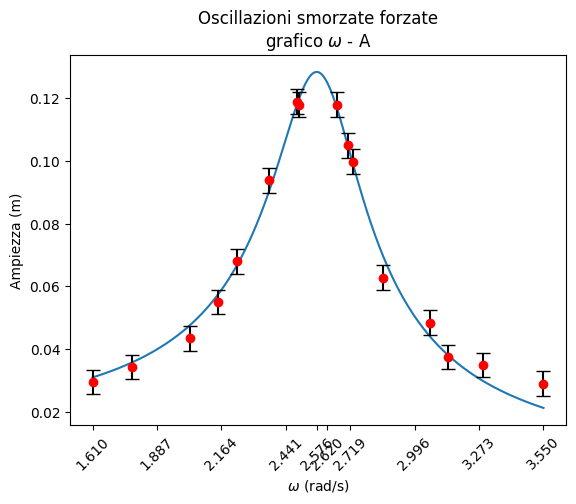

chiquadro osservato e ridotto:  12.999999999999998 0.9999999999999999


In [14]:
#interpolazione con scipy
from scipy.optimize import curve_fit

def A_w(x, M, w0, g):
    return M/np.sqrt((w0**2 - x**2)**2 + 4 * g**2 * x**2)

popt, pcov = curve_fit(A_w, omega, A)
exp_a = A_w(omega,*popt)
print(*popt)
print('incertezze su M w0 g', np.sqrt(np.diag(pcov)))
sigmaY = np.sqrt(np.sum((A - exp_a)**2)/(len(omega) - 3)) # 3 numero di parametri nell'interpolazione

x = np.linspace(min(omega), max(omega),1000)
y = A_w(x,*popt)

plt.plot(x,y)
plt.errorbar(omega,A,yerr=sigmaY,fmt='o',color='red',ecolor="black",capsize=5)
plt.title('Oscillazioni smorzate forzate\ngrafico $\omega$ - A')
plt.ylabel("Ampiezza (m)")
plt.xlabel("$\omega$ (rad/s)")
plt.xticks(list(np.linspace(min(omega),max(omega),8)) + [2.576,2.62],rotation=45)
plt.show()


chiquadro = np.sum(((A - exp_a)/sigmaY)**2)
chiquadro_ridotto = chiquadro/(len(A) - 3)
print('chiquadro osservato e ridotto: ', chiquadro,chiquadro_ridotto)